In [37]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# We'll generate an animation with matplotlib and moviepy.
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

In [38]:
digits = load_digits()
digits.data.shape

(1797, 64)

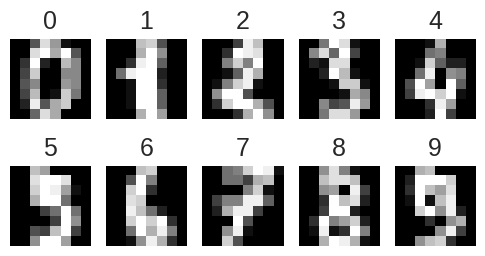

In [70]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])
plt.savefig('images/digits-generated.png', dpi=150)

In [40]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(X)

inside <function _kl_divergence_error at 0x7f1f6394c140>
1000.0
inside <function _kl_divergence_error at 0x7f1f6394c140>
1000.0
inside <function _kl_divergence_error at 0x7f1f6394c140>
1000.0


In [65]:
# This list will contain the positions of the map points at every iteration.
positions = []
def _gradient_descent(objective, p0, it, n_iter, objective_error=None, n_iter_without_progress=40,
                      momentum=0.9, learning_rate=1000.0, min_gain=0.01,
                      min_grad_norm=1e-7, min_error_diff=1e-9, verbose=0,n_iter_check=25, kwargs= None,
                      args=[]):
    # The documentation of this function can be found in scikit-learn's code.
    p = p0.copy().ravel()
    update = np.zeros_like(p)
    gains = np.ones_like(p)
    error = np.finfo(np.float).max
    best_error = np.finfo(np.float).max
    best_iter = 0
    print "inside",it,error
    for i in range(it, n_iter):
        # We save the current position.
        positions.append(p.copy())

        new_error, grad = objective(p, *args)
        error_diff = np.abs(new_error - error)
        error = new_error
        grad_norm = linalg.norm(grad)

        if error < best_error:
            best_error = error
            best_iter = i
#         elif i - best_iter > n_iter_without_progress:
#             break
#         if min_grad_norm >= grad_norm:
#             break
#         if min_error_diff >= error_diff:
#             break

        inc = update * grad >= 0.0
        dec = np.invert(inc)
        gains[inc] += 0.05
        gains[dec] *= 0.95
        np.clip(gains, min_gain, np.inf)
        grad *= gains
        update = momentum * update - learning_rate * grad
        p += update

    return p, error, i
sklearn.manifold.t_sne._gradient_descent = _gradient_descent

In [66]:
X_proj = TSNE(random_state=RS,learning_rate=1000, n_iter=200).fit_transform(X)
X_iter = np.dstack(position.reshape(-1, 2) for position in positions)

inside 0 1.79769313486e+308
inside 50 1.79769313486e+308
inside 100 1.79769313486e+308



 28%|██▊       | 167/601 [00:33<01:27,  4.96it/s]

In [67]:
print len(positions)

200


In [68]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

[MoviePy] >>>> Building video my_animation.mp4
[MoviePy] Writing video my_animation.mp4




  0%|          | 0/101 [00:00<?, ?it/s]

  2%|▏         | 2/101 [00:00<00:07, 13.00it/s]

  4%|▍         | 4/101 [00:00<00:07, 13.40it/s]

  6%|▌         | 6/101 [00:00<00:07, 13.57it/s]

  8%|▊         | 8/101 [00:00<00:06, 13.80it/s]

 10%|▉         | 10/101 [00:00<00:06, 13.53it/s]

 12%|█▏        | 12/101 [00:00<00:06, 13.80it/s]

 14%|█▍        | 14/101 [00:01<00:06, 13.66it/s]

 16%|█▌        | 16/101 [00:01<00:05, 14.25it/s]

 18%|█▊        | 18/101 [00:01<00:05, 13.89it/s]

 20%|█▉        | 20/101 [00:01<00:05, 14.02it/s]

 22%|██▏       | 22/101 [00:01<00:05, 14.20it/s]

 24%|██▍       | 24/101 [00:01<00:05, 14.05it/s]

 26%|██▌       | 26/101 [00:01<00:06, 12.47it/s]

 28%|██▊       | 28/101 [00:02<00:06, 11.51it/s]

 30%|██▉       | 30/101 [00:02<00:05, 12.01it/s]

 32%|███▏      | 32/101 [00:02<00:06, 11.34it/s]

 34%|███▎      | 34/101 [00:02<00:05, 11.87it/s]

 36%|███▌      | 36/101 [00:02<00:05, 12.48it/s]

 38%|███▊      | 38/101 [00:02<00:04, 13.02it/s]

 40%|███▉  

[MoviePy] Done.
[MoviePy] >>>> Video ready: my_animation.mp4 


[MoviePy] Building file my_animation.gif with imageio




  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:00<00:12,  8.06it/s]

  2%|▏         | 2/101 [00:00<00:14,  6.89it/s]

  3%|▎         | 3/101 [00:00<00:13,  7.11it/s]

  4%|▍         | 4/101 [00:00<00:13,  7.37it/s]

  5%|▍         | 5/101 [00:00<00:12,  7.87it/s]

  6%|▌         | 6/101 [00:00<00:13,  6.96it/s]

  7%|▋         | 7/101 [00:01<00:13,  6.99it/s]

  8%|▊         | 8/101 [00:01<00:13,  6.95it/s]

  9%|▉         | 9/101 [00:01<00:15,  6.08it/s]

 10%|▉         | 10/101 [00:01<00:14,  6.25it/s]

 11%|█         | 11/101 [00:01<00:13,  6.43it/s]

 12%|█▏        | 12/101 [00:01<00:15,  5.89it/s]

 13%|█▎        | 13/101 [00:02<00:14,  6.12it/s]

 14%|█▍        | 14/101 [00:02<00:14,  5.89it/s]

 15%|█▍        | 15/101 [00:02<00:14,  6.13it/s]

 16%|█▌        | 16/101 [00:02<00:16,  5.17it/s]

 17%|█▋        | 17/101 [00:02<00:15,  5.33it/s]

 18%|█▊        | 18/101 [00:02<00:15,  5.41it/s]

 19%|█▉        | 19/101 [00:03<00:15,  5.41it/s]

 20%|█▉        |

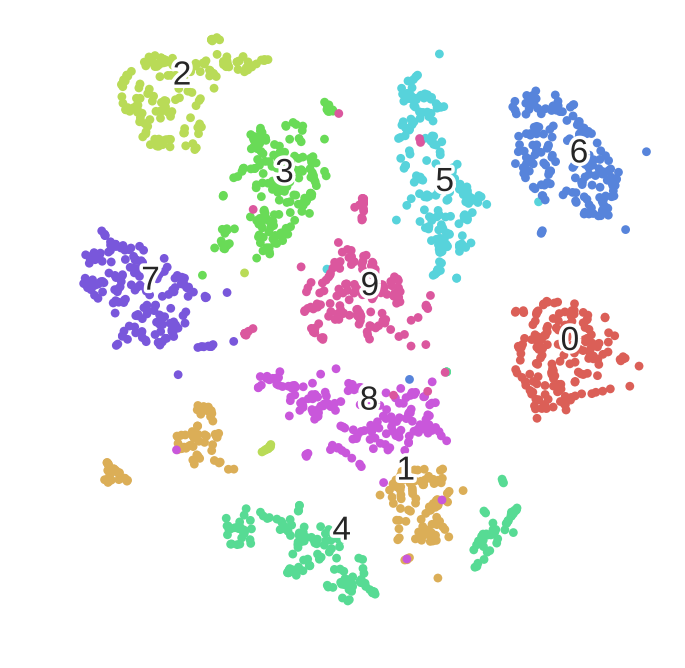

In [69]:
f, ax, sc, txts = scatter(X_iter[..., -1], y)

def make_frame_mpl(t):
    i = int(t*40)
    x = X_iter[..., i]
    sc.set_offsets(x)
    for j, txt in zip(range(10), txts):
        xtext, ytext = np.median(x[y == j, :], axis=0)
        txt.set_x(xtext)
        txt.set_y(ytext)
    return mplfig_to_npimage(f)

animation = mpy.VideoClip(make_frame_mpl,
                          duration=X_iter.shape[2]/40.0)
animation.write_videofile("my_animation.mp4", fps=20) # export as video
animation.write_gif("my_animation.gif", fps=20) # export as GIF (slow)
animation.ipython_display(fps=20, loop=True, autoplay=True)

In [ ]:
print len(positions)